# Time

In [36]:
import numpy as np
import os,sys
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/OT/Python/GW_tests/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph import *
import copy
import NN,time
import random
import timeit

In [37]:
def mean_time(X,clf,N=10):
    elapsed=[]
    for i in range(N):
        n1=random.randint(0,len(X)-1)
        n2=random.randint(0,len(X)-1)
        start_time = time.time()
        sim=clf.compute_similarity(X[n1],X[n2])
        elapsed.append(time.time() - start_time)
    return np.mean(elapsed)


# Mutag dataset

In [38]:
path='./MUTAG_2/'
dataset=list(build_MUTAG_dataset(path))
X,y=zip(*dataset)

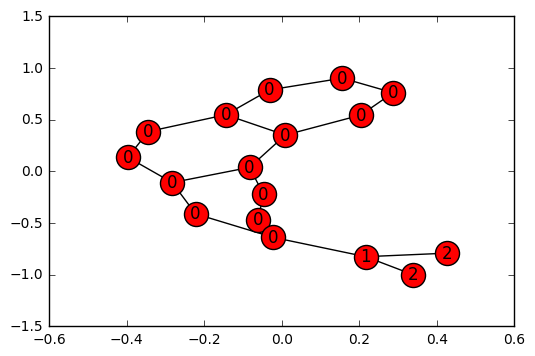

In [39]:
X[0].display_graph(labels= nx.get_node_attributes(X[0].nx_graph, 'attr_name'))

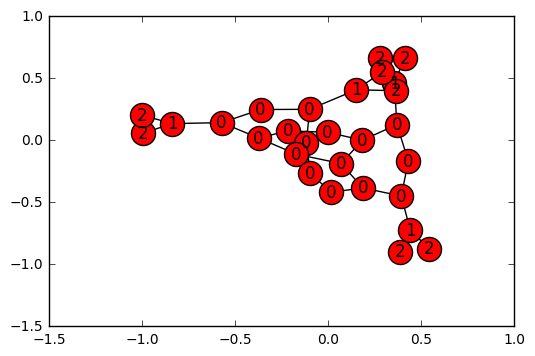

In [40]:
X[5].display_graph(labels= nx.get_node_attributes(X[5].nx_graph, 'attr_name'))

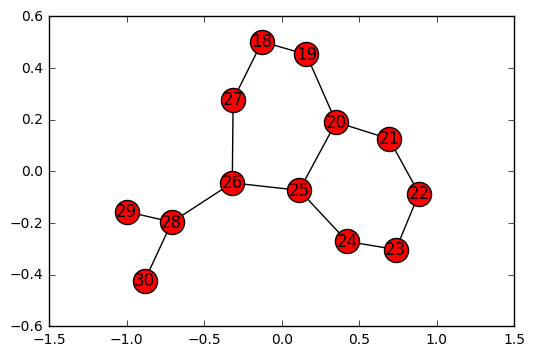

In [41]:
nx.draw_networkx(X[1].nx_graph,with_labels=True)
plt.show()

In [42]:
clf_emd=NN.Graph_EMD_1NN_Classifier(features_metric='dirac')
clf_wgw=NN.Graph_WGW_1NN_Classifier(epsilon=10,ratio=0.2,features_metric='dirac',normalize_distance=False)
clf_gw=NN.Graph_GW_1NN_Classifier(epsilon=10,normalize_distance=False)
clf_wgw_norm=NN.Graph_WGW_1NN_Classifier(epsilon=10,ratio=0.03,features_metric='dirac',normalize_distance=True)
clf_gw_norm=NN.Graph_GW_1NN_Classifier(epsilon=10,normalize_distance=True)

### Similarity

In [43]:
print('EMD time in s :',mean_time(X,clf_emd,N=100))

EMD time in s : 0.00111971139908


In [44]:
print('GW time in s :',mean_time(X,clf_gw,N=100))

GW time in s : 0.0131436538696


In [45]:
print('WGW time in s :',mean_time(X,clf_wgw,N=100))

WGW time in s : 0.0238533306122


In [46]:
print('GW normalized time in s :',mean_time(X,clf_gw_norm,N=100))

GW normalized time in s : 0.0300184607506


In [47]:
print('WGW normalized time in s :',mean_time(X,clf_wgw_norm,N=100))

WGW normalized time in s : 0.0211348962784


# Toy trees dataset

In [48]:
nTree=100
depth=3
c=20
d=30
dataset=build_binary_uniform_dataset(nTree1=nTree,nTree2=nTree,maxdepth=depth,c=c,d=d)
X,y=zip(*dataset)

In [49]:
len(X)

200

In [50]:
clf_emd=NN.Graph_EMD_1NN_Classifier()
clf_wgw=NN.Graph_WGW_1NN_Classifier(epsilon=10,ratio=0.4,normalize_distance=False,method='weighted_shortest_path')
clf_gw=NN.Graph_GW_1NN_Classifier(epsilon=10,normalize_distance=False,method='weighted_shortest_path')
clf_wgw_norm=NN.Graph_WGW_1NN_Classifier(epsilon=10,ratio=0.2,normalize_distance=True)
clf_gw_norm=NN.Graph_GW_1NN_Classifier(epsilon=10,normalize_distance=True)
clf_wgw_sh=NN.Graph_WGW_1NN_Classifier(epsilon=10,ratio=0.3,normalize_distance=False)
clf_gw_sh=NN.Graph_GW_1NN_Classifier(epsilon=10,normalize_distance=False)


In [51]:
print('EMD time in s :',mean_time(X,clf_emd,N=100))

EMD time in s : 0.000573356151581


In [70]:
print('GW time in s :',mean_time(X,clf_gw,N=100))

GW time in s : 4.32230806351


In [71]:
print('WGW time in s :',mean_time(X,clf_wgw,N=100))

WGW time in s : 4.92920589447


In [72]:
print('GW normalized time in s :',mean_time(X,clf_gw_norm,N=100))

GW normalized time in s : 6.29426383972


In [76]:
print('WGW normalized time in s :',mean_time(X,clf_wgw_norm,N=100))

WGW normalized time in s : 9.45720887184


In [74]:
print('GW shortest path time in s :',mean_time(X,clf_gw_sh,N=100))

GW shortest path time in s : 3.22947216034


In [75]:
print('WGW shortest path time in s :',mean_time(X,clf_wgw_sh,N=100))

WGW shortest path time in s : 3.76846194267
